# ⚠️🚧🛠️ Under Construction

Some very basic exploration of the functionality of [`xlwings`](https://www.xlwings.org/)

[Simple intro](http://www.et.byu.edu/~treedoug/_pages/teaching/ChEn263/Lectures/Lec23-XLWings_handout.pdf)

In [3]:
%pip install pandas openpyxl appscript psutil xlwings lifelib -q

Note: you may need to restart the kernel to use updated packages.


In [22]:
import os
import pandas as pd
import shutil
import lifelib
import xlwings as xw

### [Quickstart](https://docs.xlwings.org/en/stable/quickstart.html)

In [ ]:
wb = xw.Book()  # this will open a new workbook

### [Syntax Overview](https://docs.xlwings.org/en/latest/syntax_overview.html)

In [10]:
xw.apps.keys()  # list of open Excel apps

[28605]

In [15]:
# Active app (i.e. Excel instance)
app = xw.apps.active
app

28605

In [59]:
xw.apps[app.pid].books

Books([<Book [CVPAssessmentTool_v4_3.xlsm]>, <Book [CVPAssessmentTool_v4_3 nightmode.xlsm]>, <Book [model_point.xlsx]>])

In [57]:
xw.apps.active.books

Books([<Book [CVPAssessmentTool_v4_3.xlsm]>, <Book [CVPAssessmentTool_v4_3 nightmode.xlsm]>, <Book [model_point.xlsx]>])

In [61]:
#TODO figure out difference between app.active.books & books.active

In [60]:
# Active book
wb = xw.books.active  # in active app
wb.name

'model_point.xlsx'

# `xwings` : `Interactive Mode`
### `DATA_XLS` must be open or `xw.Book` object will not work and you will get `EventError`

In [109]:
# path to data we just downloaded
# if you are interested in how modelpoints were created,
# check out the `generating_modelpoints.ipynb` file in the repo
DATA_XLS = "./model_point.xlsx"

# ingesting our data into a dataframe (df)

# Open workbook in < Interactve Mode >
#new = xw.Book()
wb = xw.Book(DATA_XLS) # connect to a file that is open or in the current working directory

# Save workbook
#wb.save ()

# Close workbook
#wb.close ()

In [110]:
print("### Getting an idea of wb, a xw.Book object: \n")
print(f"wb.sheets: {wb.sheets} \n")
print(f"wb.name: {wb.name} \n")
print(f"wb.names: {wb.names} \n")

### Getting an idea of wb, a xw.Book object: 

wb.sheets: Sheets([<Sheet [model_point.xlsx]Sheet1>]) 

wb.name: model_point.xlsx 

wb.names: [<Name 'model_point': =Sheet1!$A$1:$K$10001>] 



In [111]:
wb.names(0).refers_to_range.options(pd.DataFrame, index=False).value

,policy_id,Age At Entry,Sex,Policy Term,Policy Count,Sum Assured,Issue date,Payment freq,Payment_term,Premium,Altered Premium
0,1.0,47.0,M,10.0,86.0,622000.0,2021-12-15,1.0,5.0,NaN,0.000000
1,2.0,29.0,M,20.0,56.0,752000.0,2004-07-02,2.0,NaN,61.139589,61.139589
2,3.0,51.0,F,NaN,83.0,799000.0,2020-10-02,12.0,10.0,158.651775,158.651775
3,4.0,32.0,F,20.0,72.0,422000.0,2011-08-05,1.0,10.0,39.517808,39.517808
4,5.0,28.0,M,15.0,99.0,605000.0,2017-05-22,NaN,10.0,41.458442,41.458442
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,47.0,None,20.0,25.0,827000.0,2008-12-01,1.0,10.0,191.420371,191.420371
9996,9997.0,30.0,M,15.0,81.0,826000.0,2008-01-13,1.0,15.0,NaN,NaN
9997,9998.0,45.0,F,20.0,10.0,NaN,2009-11-07,2.0,10.0,NaN,NaN
9998,9999.0,39.0,M,20.0,9.0,302000.0,2021-01-22,12.0,10.0,41.381991,41.381991


In [105]:
# what else can we do with our range object?
dir(wb.names(0).refers_to_range)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_impl',
 '_options',
 'add_hyperlink',
 'address',
 'api',
 'autofill',
 'autofit',
 'characters',
 'clear',
 'clear_contents',
 'clear_formats',
 'color',
 'column',
 'column_width',
 'columns',
 'copy',
 'copy_picture',
 'count',
 'current_region',
 'delete',
 'end',
 'expand',
 'font',
 'formula',
 'formula2',
 'formula_array',
 'get_address',
 'has_array',
 'height',
 'hyperlink',
 'impl',
 'insert',
 'last_cell',
 'left',
 'merge',
 'merge_area',
 'merge_cells',
 'name',
 'note',
 'number_format',
 'offset',
 'options',
 'paste',
 'raw_value',
 '

Get the process id `pid` of the Excel instances open 


In [117]:
# TODO: figure out how to get just the formula of a range object
# TODO: figure out how to relate objects via cell reference & then drop cell references
wb.names(0).refers_to_range.formula

[['policy_id',
  'Age At Entry',
  'Sex ',
  'Policy Term  ',
  'Policy Count',
  'Sum Assured ',
  'Issue date',
  'Payment freq',
  'Payment_term',
  'Premium',
  'Altered Premium'],
 ['1',
  '47',
  'M',
  '10',
  '86',
  '622000',
  '44545',
  '1',
  '5',
  '',
  '=IF($J2="","",IF($F2>50000,$J2*0.95,$J2))'],
 ['2',
  '29',
  'M',
  '20',
  '56',
  '752000',
  '38170',
  '2',
  '',
  '61.1395886201771',
  '=IF($J3="","",IF($F3>50000,$J3*0.95,$J3))'],
 ['3',
  '51',
  'F',
  '',
  '83',
  '799000',
  '44106',
  '12',
  '10',
  '158.651775292279',
  '=IF($J4="","",IF($F4>50000,$J4*0.95,$J4))'],
 ['4',
  '32',
  'F',
  '20',
  '72',
  '422000',
  '40760',
  '1',
  '10',
  '39.5178078482869',
  '=IF($J5="","",IF($F5>50000,$J5*0.95,$J5))'],
 ['5',
  '28',
  'M',
  '15',
  '99',
  '605000',
  '42877',
  '',
  '10',
  '41.4584420753476',
  '=IF($J6="","",IF($F6>50000,$J6*0.95,$J6))'],
 ['6',
  '51',
  'F',
  '',
  '58',
  '',
  '42558',
  '2',
  '10',
  '27.7597722826082',
  '=IF($J7="",""

## Modifying Excel Workbook from `python`

In [12]:
# Assigning values to a cell
# Notice the mismatched dimensionality
# Impact is similar to pasting table into a cell in Excel
wb.sheets[0]["A1"].value = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

We obsere, not only does our `pd.DataFrame` expands beyond `"A1"`,`"A1"` is not filled with the `pd.DataFrame` 

However if we assign a  single value to `"A1"` the value of `"A1"` itself is set. Seems to be related to the dimensionality mismatch. Is almost like pasting a table to a cell in Excel.

# `xwings` : `Reader Mode`

In [22]:
# set to True if you want to remove existing cluster folder
REMOVE_EXISTING = True
MAKE = True

#check if there is a folder named "cluster" in the current directory
if os.path.exists("cluster") & REMOVE_EXISTING:
    shutil.rmtree("cluster")

if MAKE: lifelib.create("cluster", r"./cluster")

In [14]:
# Reader mode: read
import os
os.listdir("cluster")

['cashflows_seriatim_10K.xlsx',
 'generate_model_points_for_cluster.ipynb',
 'BasicTerm_ME_for_Cluster',
 'pv_seriatim_10K_lapse50.xlsx',
 'pv_seriatim_10K.xlsx',
 'cashflows_seriatim_10K_lapse50.xlsx',
 'pv_seriatim_10K_mort15.xlsx',
 'cluster_model_points.ipynb',
 'cashflows_seriatim_10K_mort15.xlsx']

### Loading our data into `xw.sheet` objects?

In [15]:
base = xw.Book('cluster/cashflows_seriatim_10K.xlsx')
base.sheets

Sheets([<Sheet [cashflows_seriatim_10K.xlsx]Sheet1>])

In [16]:
lapse50 = xw.Book('cluster/cashflows_seriatim_10K_lapse50.xlsx')
lapse50.sheets

Sheets([<Sheet [cashflows_seriatim_10K_lapse50.xlsx]Sheet1>])

In [19]:
mort15 = xw.Book('cluster/cashflows_seriatim_10K_mort15.xlsx')
mort15.sheets

Sheets([<Sheet [cashflows_seriatim_10K_mort15.xlsx]Sheet1>])

In [67]:
cfs = pd.read_excel('cluster/cashflows_seriatim_10K.xlsx', index_col=0)
cfs_lapse50 = pd.read_excel('cluster/cashflows_seriatim_10K_lapse50.xlsx', index_col=0)
cfs_mort15 = pd.read_excel('cluster/cashflows_seriatim_10K_mort15.xlsx', index_col=0)
cfs_list = [cfs, cfs_lapse50, cfs_mort15]

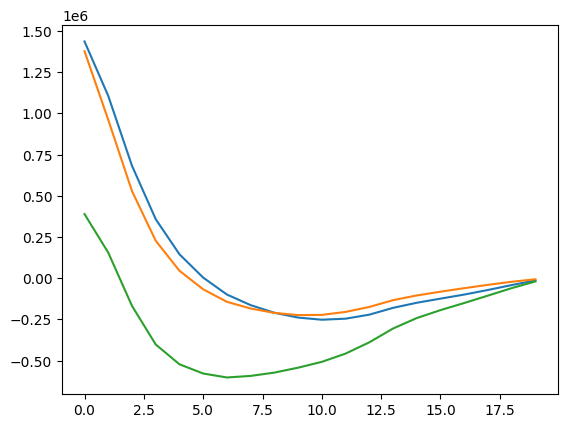

In [96]:
plt.plot(cfs.sum())
plt.plot(cfs_lapse50.sum())
plt.plot(cfs_mort15.sum())

<Axes: title={'center': 'Cashflows'}>

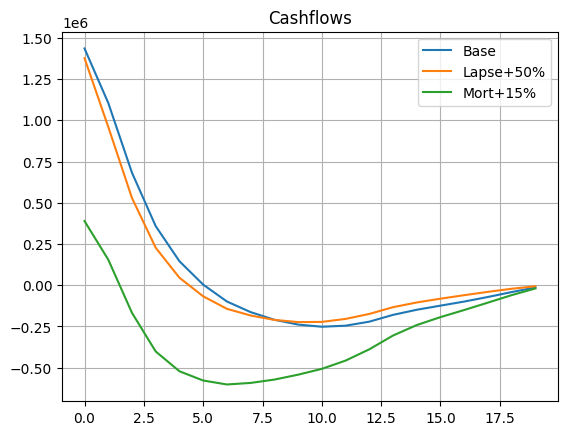

In [68]:
pd.DataFrame.from_dict({
    'Base': cfs.sum(),
    'Lapse+50%': cfs_lapse50.sum(),
    'Mort+15%': cfs_mort15.sum()}).plot(grid=True, title='Cashflows')

### What can one do with a sheet object?

```
for func in list(dir(base)):
    if not func.startswith("_"):
        print("\n" + str(func) + "\n")
        print(getattr(base,func))
```

In [43]:
# How .selection works
for i in [0, 1, -1]:
    print(str(base.selection(i)) + "\n")


<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1>

<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1>

<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1048576>



In [62]:
len(base.selection(0).expand().value)

10001

In [ ]:
len(base.selection(0).expand().value)

### [`TOP-LEVEL FUNCTIONS: view()`](https://docs.xlwings.org/en/stable/api/top_level_functions.html#xlwings.view)

`view()` takes any object and writes it to an Excel table as a new object


> *ℹ️ Only use this in an interactive context like e.g. a Jupyter notebook! Don’t use this in a script as it depends on the active book.*


In [29]:
from xlwings import view
# using `view` we can see how .selection.expand() works
# notice how .expand() selects all adjacent cells
df = pd.DataFrame(data = base.selection(0).expand().value)
view(df)

In [84]:
#If you wanted to reuse the same workbook,
# provide a sheet object
#TODO! This is not working 
#specific_sheet = xw.Book()
#view(df, sheet=specific_sheet)

### [`TOP-LEVEL FUNCTIONS: load()`](https://docs.xlwings.org/en/stable/api/top_level_functions.html#xlwings.load)

Loads the selected cell(s) of the active workbook into a `pd.DataFrame`.

If you select a single cell that has adjacent cells, the range is auto-expanded (via current region) and turned into a `pd.DataFrame`

> *ℹ️ Only use this in an interactive context like e.g. a Jupyter notebook! Don’t use this in a script as it depends on the active book.*

In [99]:
base = xw.Book('cluster/cashflows_seriatim_10K.xlsx')
base_df = xw.load()

In [92]:
lapse50 = xw.Book('cluster/cashflows_seriatim_10K_lapse50.xlsx')
lapse50_df = xw.load()

In [91]:
mort15 = xw.Book('cluster/cashflows_seriatim_10K_mort15.xlsx')
mort15_df = xw.load()

### [`UDF decorators`](https://docs.xlwings.org/en/stable/api/udf_decorators.html)
